In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Visualize the dataset

Target labels:  [3 5 5 0 1 6 6 5 1 1]


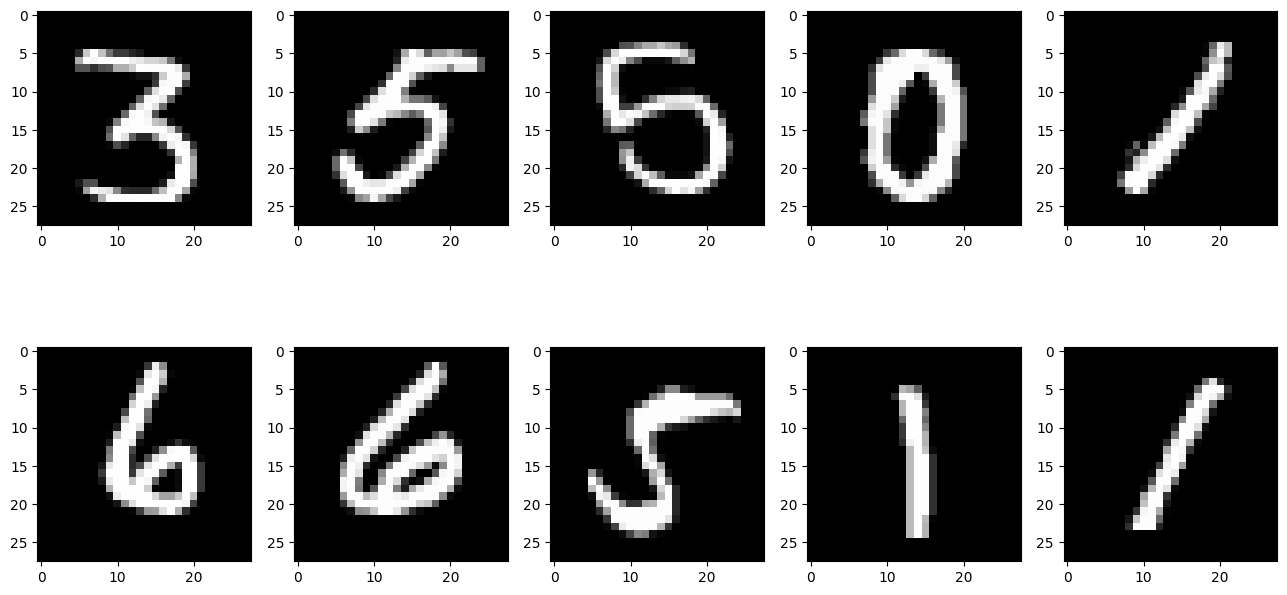

In [3]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [4]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [7]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8436 - loss: 0.5152
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9587 - loss: 0.1384
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9709 - loss: 0.0937
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9771 - loss: 0.0723
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0625
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9846 - loss: 0.0469
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9867 - loss: 0.0412
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9871 - loss: 0.0380
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9898 - loss: 0.0327
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9912 - loss: 0.0277


Plot the loss and accuracy graphs

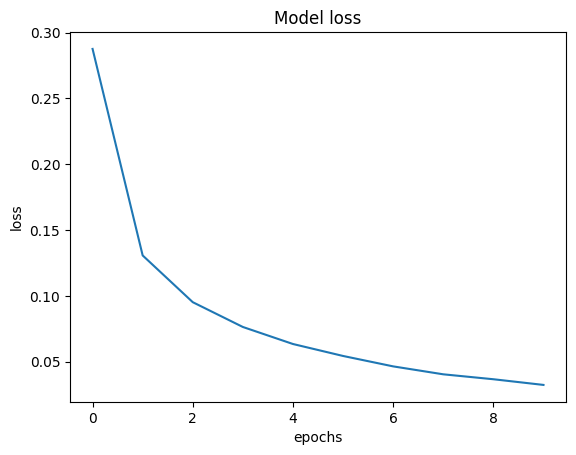

In [8]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

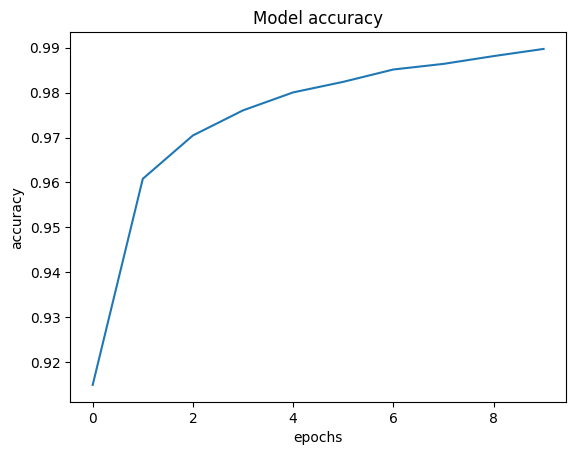

In [9]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [10]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9720 - loss: 0.1050
Loss of the Test dataset is: 0.09300138801336288
Accuracy of the test dataset is: 0.9753999710083008


Save the model weights

In [14]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')

In [20]:
from tensorflow.keras import models, layers

model = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(new_train_data.reshape(-1, 784), new_train_target,
                    validation_split=0.1,
                    epochs=10,
                    batch_size=128,
                    verbose=2)

Epoch 1/10
422/422 - 5s - 11ms/step - accuracy: 0.9028 - loss: 0.3395 - val_accuracy: 0.9620 - val_loss: 0.1436
Epoch 2/10
422/422 - 4s - 9ms/step - accuracy: 0.9556 - loss: 0.1510 - val_accuracy: 0.9735 - val_loss: 0.1028
Epoch 3/10
422/422 - 3s - 6ms/step - accuracy: 0.9690 - loss: 0.1067 - val_accuracy: 0.9755 - val_loss: 0.0867
Epoch 4/10
422/422 - 6s - 15ms/step - accuracy: 0.9762 - loss: 0.0815 - val_accuracy: 0.9778 - val_loss: 0.0803
Epoch 5/10
422/422 - 4s - 9ms/step - accuracy: 0.9806 - loss: 0.0656 - val_accuracy: 0.9803 - val_loss: 0.0729
Epoch 6/10
422/422 - 3s - 7ms/step - accuracy: 0.9841 - loss: 0.0540 - val_accuracy: 0.9817 - val_loss: 0.0659
Epoch 7/10
422/422 - 6s - 14ms/step - accuracy: 0.9867 - loss: 0.0448 - val_accuracy: 0.9823 - val_loss: 0.0668
Epoch 8/10
422/422 - 3s - 7ms/step - accuracy: 0.9885 - loss: 0.0381 - val_accuracy: 0.9820 - val_loss: 0.0654
Epoch 9/10
422/422 - 5s - 12ms/step - accuracy: 0.9911 - loss: 0.0313 - val_accuracy: 0.9823 - val_loss: 0.06

In [21]:
from tensorflow.keras import regularizers

model_l1 = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1(1e-5)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


In [22]:
model_l2 = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l2(1e-4)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


In [23]:
model_both = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(256, activation='relu',
                 kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


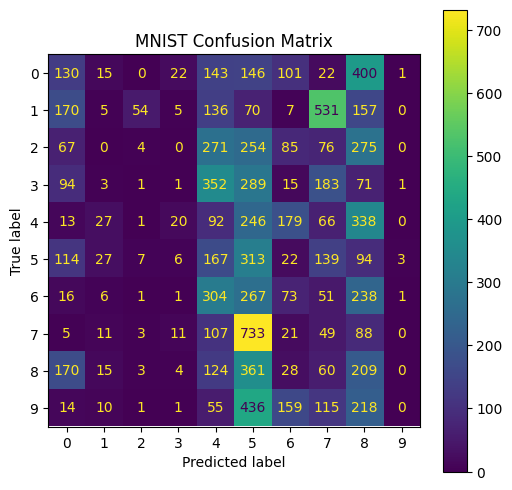

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = model_both.predict(new_test_data.reshape(-1, 784)).argmax(axis=1)

cm = confusion_matrix(test_target, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=range(10))

fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, values_format='d')
plt.title("MNIST Confusion Matrix")
plt.show()